In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
import os

c:\Users\cheri\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
# Load the training data
train_df = pd.read_csv('data/train.csv')

In [ ]:
# Function to display a digit image
def display_digit(index, data, labels):
    label = labels[index]
    image = data.iloc[index].values.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

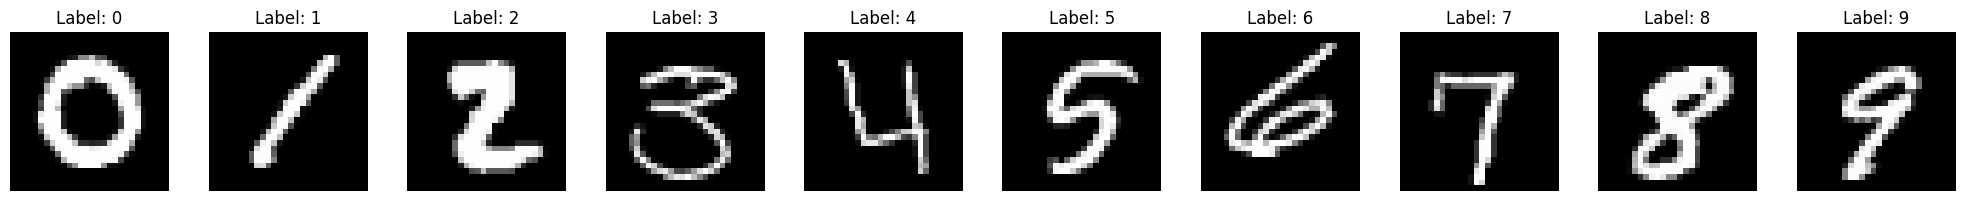

In [ ]:
# Displaying examples of dataset images
def visualize_data(dataframe):
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    for digit in range(10):
        index = dataframe[dataframe['label'] == digit].index[0]  # First occurrence
        image = dataframe.loc[index].values[1:].reshape(28, 28)  # Skip label
        axes[digit].imshow(image, cmap='gray')
        axes[digit].set_title(f'Label: {digit}')
        axes[digit].axis('off')
    plt.tight_layout()
    plt.show()

visualize_data(train_df)

In [ ]:
# Data preprocessing
X = train_df.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0  # Normalize
y = to_categorical(train_df['label'], num_classes=10)  # One-hot encode labels

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model architecture
input_shape = (28, 28, 1)
num_classes = 10

model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()

c:\Users\cheri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Callbacks for early stopping and model checkpointing
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
]

In [ ]:
# Train the model with validation
history = model.fit(
    X_train, y_train, 
    batch_size=128, 
    epochs=50,  # Increased epochs, but early stopping will likely stop training earlier
    validation_data=(X_val, y_val),
    callbacks=callbacks
)

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6904 - loss: 1.0105 - val_accuracy: 0.9582 - val_loss: 0.1459
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9549 - loss: 0.1502 - val_accuracy: 0.9742 - val_loss: 0.0882
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9708 - loss: 0.1006 - val_accuracy: 0.9795 - val_loss: 0.0683
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9739 - loss: 0.0859 - val_accuracy: 0.9812 - val_loss: 0.0598
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9766 - loss: 0.0757 - val_accuracy: 0.9850 - val_loss: 0.0507
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9797 - loss: 0.0680 - val_accuracy: 0.9855 - val_loss: 0.0481
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9813 - loss: 0.0575 - val_accuracy: 0.9862 - val_loss: 0.0443
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9828 - loss: 0.0531 - val_accuracy: 

In [ ]:
# Load the best model saved by ModelCheckpoint
model = load_model('best_model.keras')

In [ ]:
# Evaluate the best model
score = model.evaluate(X_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.02670726366341114
Validation accuracy: 0.9921428561210632


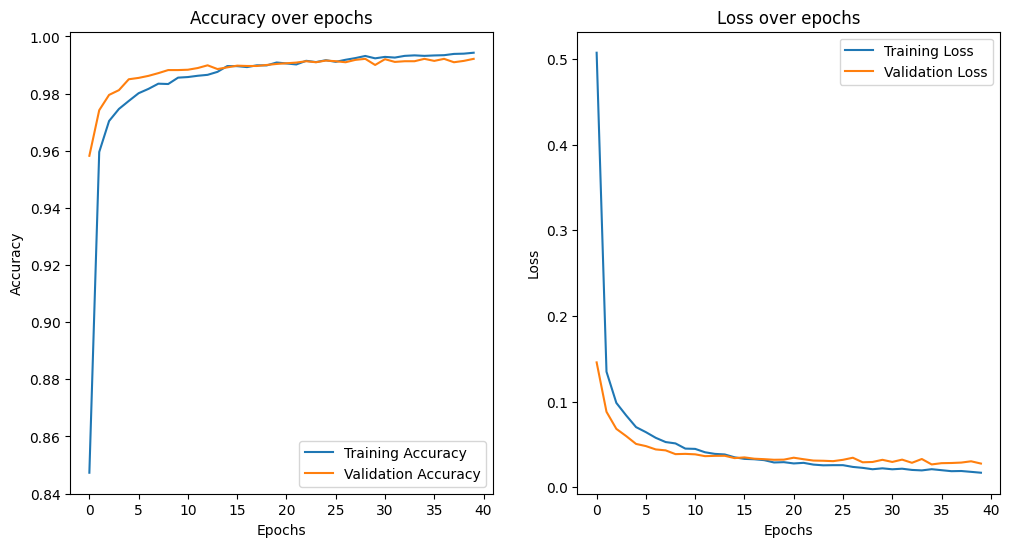

In [ ]:
# Plotting training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

plot_training_history(history)